In [10]:
from CSP import *
from CSP.variable import Variable
from CSP.constraint import Constraint
from CSP.CSP import CSP
from CSP.Sudoku_variables import Sudoku_Vars
from CSP.constraint_helpers import all_different, non_directional
from CSP.strategysearch import SudokuSearch


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

simple        = pd.read_csv("simple.csv", index_col=False)
easy          = pd.read_csv("easy_50.csv", index_col=False)
intermediate  = pd.read_csv("intermediate_noninf.csv", index_col=False)
print(intermediate.columns)
intermediate.drop(["Unnamed: 0"], inplace=True, axis=1)

simple.drop(['Givens', 'Singles', 'Hidden Singles', 'Naked Pairs',
       'Hidden Pairs', 'Pointing Pairs/Triples', 'Box/Line Intersections',
       'Guesses', 'Backtracks'], inplace=True, axis=1)

easy.drop(['Givens', 'Singles', 'Hidden Singles', 'Naked Pairs',
       'Hidden Pairs', 'Pointing Pairs/Triples', 'Box/Line Intersections',
       'Guesses', 'Backtracks'], inplace=True, axis=1)

df = pd.concat([simple,easy,intermediate], ignore_index=True)



#df = df.sample(frac=1).reset_index(drop=True)

df["Score"]    = 0
df["Time"]     = 0
df["TreeSize"] = 0
df.sample(50)


Index(['Unnamed: 0', 'Puzzle', 'Difficulty'], dtype='object')


,Puzzle,Difficulty,Score,Time,TreeSize
179,.5.1....8.4...35..3.....9....53....6.8.6.2.5.6...,Intermediate,0,0,0
114,..6.9..3...75.3..6....1.92....3.......1......7...,Easy,0,0,0
60,.562..4.13.1....2...........721.635.......1......,Simple,0,0,0
51,2..98.15....43.....3..6...9.56..2.4...8....62....,Simple,0,0,0
36,9.1.7...58..1....3.4.6.5.....7.6...........7.1...,Simple,0,0,0
163,3..1.86..8.......7....75..8..5..91.6.948.........,Intermediate,0,0,0
12,.8.235..1...8......64.9......9.584....8......2...,Simple,0,0,0
41,....7.4.5..3..4.2........9.....93.56.....53.4....,Simple,0,0,0
31,.42...3.....4.2.....631......5....7....165...3...,Simple,0,0,0
49,..1.......2...38...........19.4......6...2..4....,Simple,0,0,0


In [13]:
testbed = pd.DataFrame(columns=df.columns)
testbed = testbed.append(df[df["Difficulty"] == "Simple"].sample(10), ignore_index=True)
testbed = testbed.append(df[df["Difficulty"] == "Easy"].sample(10), ignore_index=True)
testbed = testbed.append(df[df["Difficulty"] == "Intermediate"].sample(10), ignore_index=True)
testbed.head()

,Puzzle,Givens,Singles,Hidden Singles,Naked Pairs,Hidden Pairs,Pointing Pairs/Triples,Box/Line Intersections,Guesses,Backtracks,Difficulty,Score,Time,TreeSize
0,.....1.....1..7.....8.......85...9...9...41.5....,27,54,0,0,0,0,0,0,0,Simple,0,0,0
1,...3..8......74.31...859....9..1..8....9.8.2.2...,29,52,0,0,0,0,0,0,0,Simple,0,0,0
2,.....6.73...5..2....7.23..............8.1.7.9....,26,55,0,0,0,0,0,0,0,Simple,0,0,0
3,......9...3..4..5.2.5....6....58.69.85.4...3.6...,26,55,0,0,0,0,0,0,0,Simple,0,0,0
4,.8...2.....7.5.....9..4..3..754..3....1.93.......,24,57,0,0,0,0,0,0,0,Simple,0,0,0


In [3]:
end_cost_list = {
    "Simple": [],
    "Easy":[],
    "Intermediate":[]
}
curr_working_df = df
for idx, row in curr_working_df.iterrows():
    puzzle_ = []
    for i in range(9):
        puzzle_.append(list(map(int, row.get('Puzzle')[i*9:(i+1)*9].replace('.','0'))))

    S = Sudoku_Vars(puzzle_)

    constraints = []
    constraints += all_different(S.get_box(0,0))
    constraints += all_different(S.get_box(0,1))
    constraints += all_different(S.get_box(0,2))
    constraints += all_different(S.get_box(1,0))
    constraints += all_different(S.get_box(1,1))
    constraints += all_different(S.get_box(1,2))
    constraints += all_different(S.get_box(2,0))
    constraints += all_different(S.get_box(2,1))
    constraints += all_different(S.get_box(2,2))

    vars = []
    for r in range(9):
        vars += S.get_row(r)
        constraints += all_different(S.get_row(r))
        constraints += all_different(S.get_col(r))

    csp = CSP(vars, constraints)

    t0 = time.time()
    cost, end_costs, treeSize = SudokuSearch(csp,S)
    print(f"time: {time.time() - t0}")
    end_cost_list[row.get("Difficulty")].append(end_costs[:])
    curr_working_df.loc[idx,"Score"] = cost
    curr_working_df.loc[idx,"Time"] = time.time() - t0
    curr_working_df.loc[idx,"TreeSize"] = treeSize

curr_working_df.to_csv(f'out{time.time()}.csv')

-------------------------------
the cost was  428.58342562372997
-------------------------------

time: 0.49173831939697266
-------------------------------
the cost was  532.3841394257258
-------------------------------

time: 0.6471595764160156
-------------------------------
the cost was  580.5800075382517
-------------------------------

time: 0.6438009738922119
-------------------------------
the cost was  547.2304473981505
-------------------------------

time: 0.9910430908203125
-------------------------------
the cost was  610.3436239597494
-------------------------------

time: 0.595531702041626
-------------------------------
the cost was  423.49371240900234
-------------------------------

time: 0.2988574504852295
-------------------------------
the cost was  401.5115072489856
-------------------------------

time: 0.4039340019226074
-------------------------------
the cost was  344.51475661466975
-------------------------------

time: 0.44238996505737305
--------------------

In [15]:
noninfdf = curr_working_df[curr_working_df.Score != float("inf")]

81
50
130


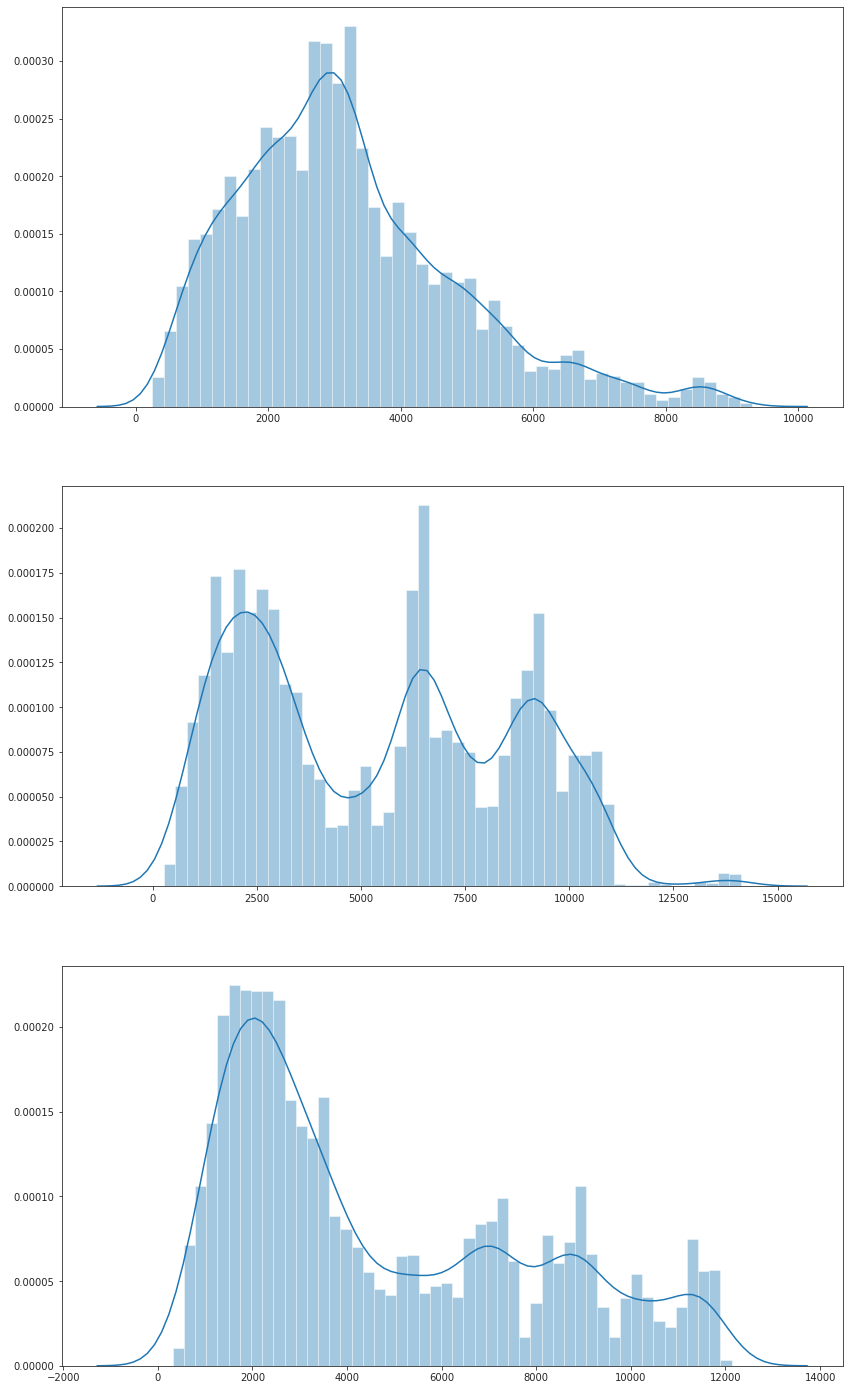

In [10]:
simplecosts = []
easycosts   = []
intercosts  = []
for i in end_cost_list["Simple"]:
    simplecosts.extend(i)
for i in end_cost_list["Easy"]:
    easycosts.extend(i)
for i in end_cost_list["Intermediate"]:
    if any(x != float("inf") for x in i):
        intercosts.extend(i)
print(len(end_cost_list["Simple"]))
print(len(end_cost_list["Easy"]))
print(len(end_cost_list["Intermediate"]))
sns.set_style('ticks')
a4_dims = (16, 8)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(14,25))
sns.distplot(ax=axs[0],bins=50, a=simplecosts)
sns.distplot(ax=axs[1],bins=50, a=easycosts)
sns.distplot(ax=axs[2],bins=50, a=intercosts)

plt.close(2)
plt.close(3)
plt.close(4)
plt.show()

In [7]:
len(curr_working_df[curr_working_df["Difficulty"] =="Intermediate"])
len(curr_working_df[(curr_working_df["Score"] == float("inf")) & (curr_working_df["Difficulty"] == "Intermediate")])

67

81
50
130


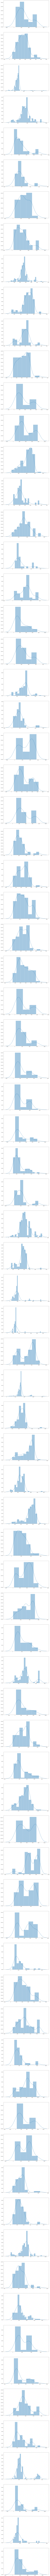

In [13]:

print(len(end_cost_list["Simple"]))
print(len(end_cost_list["Easy"]))
print(len(end_cost_list["Intermediate"]))
sns.set_style('ticks')
a4_dims = (16, 8)
fig, axs = plt.subplots(nrows=len(end_cost_list["Simple"]), ncols=1, figsize=(14,10*len(end_cost_list["Simple"])))
for i in range(len(end_cost_list["Simple"])):
    sns.distplot(ax=axs[i], a=end_cost_list["Simple"][i])

plt.close(2)
plt.close(3)
plt.close(4)
plt.show()